In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# ask - phase
#1. relationship between budget and total_collection(profit and loss)
#2. profit/total_movies and loss/total_movies
#3. relation between budget and (profit/loss)

In [5]:
# prepare phase - acquire data(the following data is downloaded from kaggle) 
# import data
df = pd.read_csv('movies_revenue.csv')
df

# process - clean data
df.dropna(axis=0, how='all')

# thier are no null values
# let us make budget in crores 
df['total_budget'] = df['total_budget']/10000000
df['box_office_collection'] = df['box_office_collection']/10000000

df

,box_office_collection,total_budget
0,97.94,50.0
1,95.50,75.0
2,94.87,100.0
3,93.45,100.0
4,93.37,100.0
...,...,...
266,2.00,16.0
267,0.53,30.0
268,0.30,15.0
269,240.22,80.0


In [6]:
# analyse
# 1. relationship between budget and total_collection

# a. movie having budget less than earnings ---> profit scenario
# disable warning 
pd.options.mode.chained_assignment = None  # default='warn'
profit = df.loc[(df['total_budget'])<=(df['box_office_collection'])]
profit['Total Earnings'] = profit['box_office_collection']-profit['total_budget']
profit

,box_office_collection,total_budget,Total Earnings
0,97.94,50.0,47.94
1,95.50,75.0,20.50
15,89.05,30.0,59.05
16,87.87,30.0,57.87
17,86.84,40.0,46.84
...,...,...,...
244,103.19,75.0,28.19
245,102.93,70.0,32.93
251,10.46,10.0,0.46
269,240.22,80.0,160.22


In [7]:
# b. movies having budget more than earnings

loss = df.loc[(df['total_budget'])>(df['box_office_collection'])]
loss['Total Loss'] = loss['box_office_collection']-loss['total_budget']
loss

,box_office_collection,total_budget,Total Loss
2,94.87,100.0,-5.13
3,93.45,100.0,-6.55
4,93.37,100.0,-6.63
5,91.40,100.0,-8.60
6,90.37,100.0,-9.63
...,...,...,...
264,4.00,16.0,-12.00
265,3.75,16.0,-12.25
266,2.00,16.0,-14.00
267,0.53,30.0,-29.47


In [8]:
#2. profit/total_movies and loss/total_movies
pro = len(df)-len(profit)
los = len(df)-len(loss)
print('profitable movies out off ', len(df), ' is ',pro)
print('loss making movies out off ', len(df), ' is ',los)

profitable movies out off  271  is  159
loss making movies out off  271  is  112


In [19]:
#3.1 relation between budget and profit
rel_pro = profit[['total_budget','Total Earnings']].copy()
rel_pro['earning/budget'] = rel_pro['Total Earnings']/rel_pro['total_budget']
rel_pro

# the earning to budget ratio is not consistant therefore earnings does't depends on budget of the movie

,total_budget,Total Earnings,earning/budget
0,50.0,47.94,0.958800
1,75.0,20.50,0.273333
15,30.0,59.05,1.968333
16,30.0,57.87,1.929000
17,40.0,46.84,1.171000
...,...,...,...
244,75.0,28.19,0.375867
245,70.0,32.93,0.470429
251,10.0,0.46,0.046000
269,80.0,160.22,2.002750


In [20]:
#3.3 relation between budget and loss
rel_loss = loss[['total_budget','Total Loss']].copy()
rel_loss['loss/budget'] = np.abs(loss['Total Loss'])/loss['total_budget']
rel_loss

# the loss to budget ratio is consistant therefore loss depends on budget of the movie, the loss to budget ratio always varies from 0 to 1

,total_budget,Total Loss,loss/budget
2,100.0,-5.13,0.051300
3,100.0,-6.55,0.065500
4,100.0,-6.63,0.066300
5,100.0,-8.60,0.086000
6,100.0,-9.63,0.096300
...,...,...,...
264,16.0,-12.00,0.750000
265,16.0,-12.25,0.765625
266,16.0,-14.00,0.875000
267,30.0,-29.47,0.982333


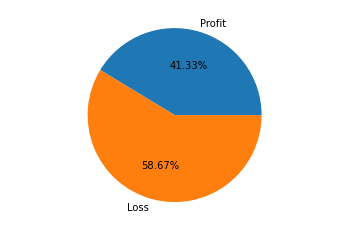

In [21]:
# visualize
# 1. relationship between budget and total_collection
l = [len(profit), len(loss)]
plt.axis('equal')
plt.pie(l, labels=['Profit', 'Loss'], autopct='%0.2f%%')
plt.show()

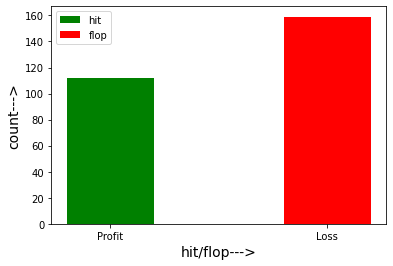

In [24]:
#2. profit/total_movies and loss/total_movies
x = ['profit', 'loss']
y = [len(profit), len(loss)]
plt.bar('Profit',len(profit), label='hit', width=0.4, color='g')
plt.bar('Loss',len(loss), label='flop', width=0.4, color='r')
plt.legend()
plt.ylabel('count--->', fontsize=14)
plt.xlabel('hit/flop--->', fontsize=14)
plt.show()

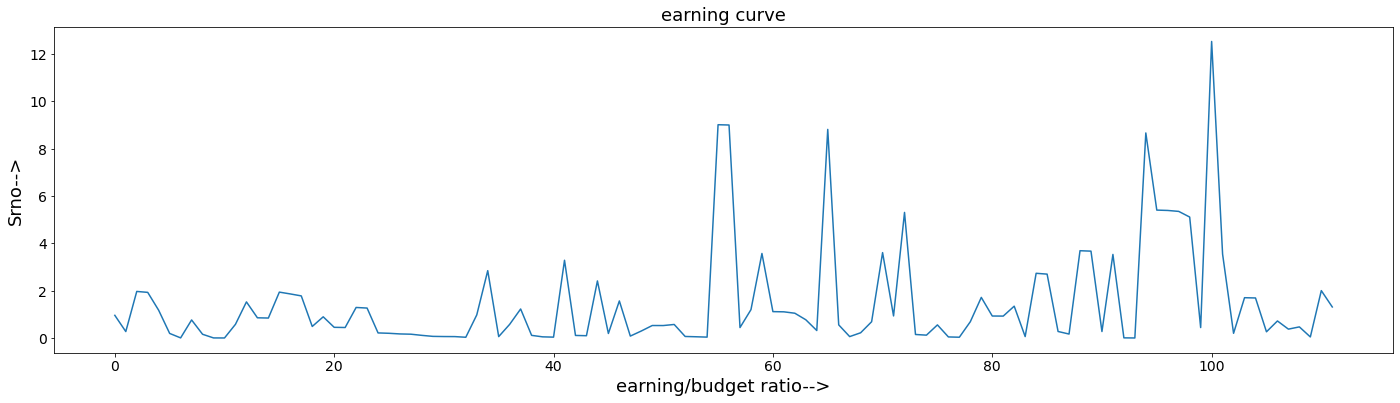

In [31]:
#3. relation between budget and (profit/loss)
#3.1 earnings curve
n1 = np.arange(0, len(rel_pro), 1)
f1 = plt.figure()
f1.set_figwidth(24)
f1.set_figheight(6)
plt.plot(n1, rel_pro['earning/budget'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('earning/budget ratio-->', fontsize=18)
plt.ylabel('Srno-->', fontsize=18)
plt.title('earning curve', fontsize=18)
plt.show()

# the earning to budget ratio is not consistant therefore earnings does't depends on budget of the movie

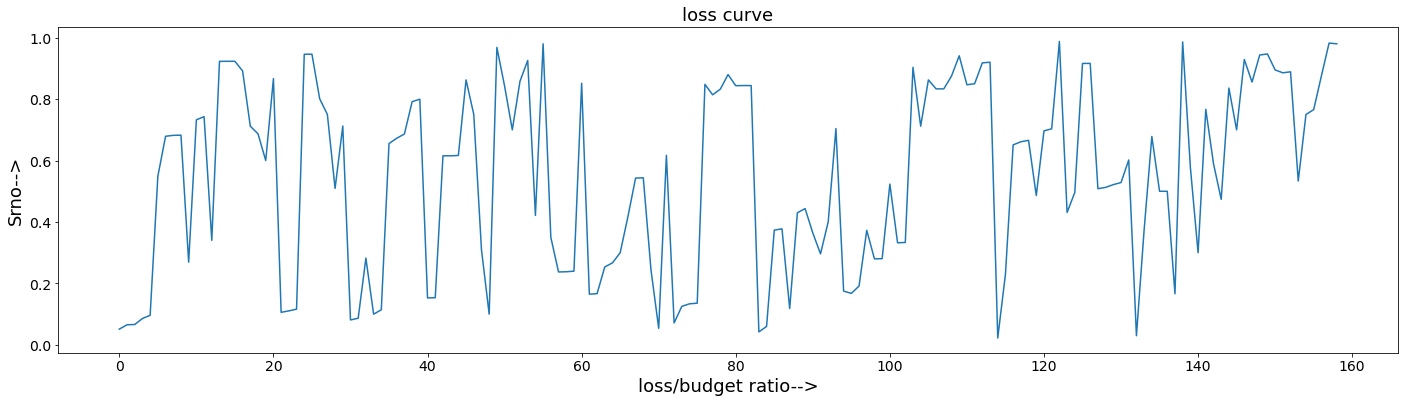

In [32]:
#3.2 loss curve
n1 = np.arange(0, len(rel_loss), 1)
f2 = plt.figure()
f2.set_figwidth(24)
f2.set_figheight(6)
plt.plot(n1, rel_loss['loss/budget'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('loss/budget ratio-->', fontsize=18)
plt.ylabel('Srno-->', fontsize=18)
plt.title('loss curve', fontsize=18)
plt.show()

# the loss to budget ratio is consistant therefore loss depends on budget of the movie, the loss to budget ratio always varies from 0 to 1